# Klasyfikacja obrazów z użyciem Keras

In [2]:
import numpy as np
import pandas as pd

from tqdm import *
from keras import *
from sklearn.model_selection import train_test_split

from matplotlib import pyplot as plt

### Wyodrębnienie zbioru treningowego i walidacyjnego
#### Wczytanie zbioru danych za pomocą csv (zawierającego etykiety i ścieżki)

In [3]:
train_df = pd.read_csv("sources/signs/Train.csv")

In [4]:
train_images = []

for i in tqdm(range(train_df.shape[0])):
    img = utils.load_img(
        train_df['Path'][i],
        target_size = (28,28,3) # Określa, że docelowe zdjęcie ma mieć 16 × 16 pikseli i 3 kanały kolorów (RGB)
    )
    img = utils.img_to_array(img) # Przekształca zdjęcie w formę tablicy numpy
    img = img / 255 # Normalizuje wartość pikseli do zakresu 0-1
    train_images.append(img)

X = np.array(train_images)

100%|██████████| 39209/39209 [00:09<00:00, 3997.09it/s]


In [5]:
y = utils.to_categorical(
    train_df["ClassId"].values # ClassId zawiera z góry założone klasy zdjęć w zbiorze treningowym
)

#### Wyodrębnienie podzbioru treningowego i walidującego

In [6]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y)

### Przygotowanie modelu sieci neuronowej

![](https://blogger.googleusercontent.com/img/b/R29vZ2xl/AVvXsEhGzMoLJs7KifLcZp-wxKtYhrgl-dsbXlreDKQtrFLsYGipbklI1KKRGbT3ey7euqDxR-Z_VLZWjcGantWU6WUZoDACsQ0XeEHCQhVpANHIaTUhr5Z3IfaPfI6YEpOqPDCZlYqiLDapCBc/s1600/Capture.PNG)

In [7]:
model = Sequential(
    layers = 
        [layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
        layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(43, activation='softmax')] # Zbiór danych zawiera założone 43 klasy
)

In [8]:
model.compile(
    loss = losses.CategoricalCrossentropy(), # Funkcja straty
    optimizer = 'Adam',
    metrics= ['accuracy'] # Accuracy = Suma prawidłowych predykcje / Suma predykcji
)

In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [10]:
model.fit(
    X_train,
    y_train,
    epochs= 3,
    validation_data = (X_valid, y_valid)
)

Epoch 1/3
919/919 ━━━━━━━━━━━━━━━━━━━━ 15s 16ms/step - accuracy: 0.6159 - loss: 1.4883 - val_accuracy: 0.9570 - val_loss: 0.1687
Epoch 2/3
919/919 ━━━━━━━━━━━━━━━━━━━━ 16s 17ms/step - accuracy: 0.9667 - loss: 0.1207 - val_accuracy: 0.9724 - val_loss: 0.1044
Epoch 3/3
919/919 ━━━━━━━━━━━━━━━━━━━━ 16s 17ms/step - accuracy: 0.9832 - loss: 0.0544 - val_accuracy: 0.9705 - val_loss: 0.1082


## Predykcja
#### Wczytanie zbioru danych za pomocą csv (zawierającego etykiety i ścieżki)

In [11]:
test_df = pd.read_csv("sources/signs/Test.csv")

In [12]:
test_images = []

for i in tqdm(range(test_df.shape[0])):
    img = utils.load_img(
        test_df['Path'][i],
        target_size = (28,28,3)
    )
    img = utils.img_to_array(img)
    img = img / 255
    test_images.append(img)

X_test = np.array(test_images)

100%|██████████| 12630/12630 [00:03<00:00, 4099.06it/s]


In [13]:
y_test = utils.to_categorical(
    test_df['ClassId'].values
)

#### Utworzenie macierzy wyników

In [14]:
model.fit(X, y, epochs=3, validation_data=(X_test, y_test))

Epoch 1/3
1226/1226 ━━━━━━━━━━━━━━━━━━━━ 24s 19ms/step - accuracy: 0.9857 - loss: 0.0522 - val_accuracy: 0.9375 - val_loss: 0.2698
Epoch 2/3
1226/1226 ━━━━━━━━━━━━━━━━━━━━ 25s 20ms/step - accuracy: 0.9926 - loss: 0.0244 - val_accuracy: 0.9362 - val_loss: 0.2783
Epoch 3/3
1226/1226 ━━━━━━━━━━━━━━━━━━━━ 23s 19ms/step - accuracy: 0.9925 - loss: 0.0253 - val_accuracy: 0.9368 - val_loss: 0.2910


In [15]:
predictions = np.argmax(model.predict(X_test), axis = 1)

395/395 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


#### Przedstawienie wyników dla wybranego przykładu

Actual		 22
Predicted	 22


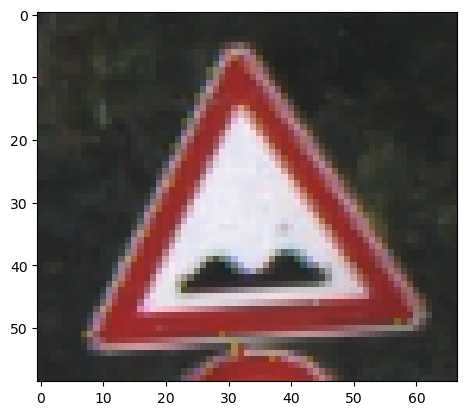

In [16]:
img_number = 500

img = plt.imread(test_df["Path"][img_number])
plt.imshow(img)

print("Actual\t\t", test_df["ClassId"][img_number])
print("Predicted\t", predictions[img_number] )